## Examen de Simulacion
## Nicolas Augusto Añazco Pereira
## Decimo Ciclo

## Introducción:

El golpe económico de la crisis sanitaria del corona virus no va a ser cosa de semanas, sino de meses. Dentro de una de las etapas importantes que están a la vuelta de la esquina son las elecciones presidenciales y asambleístas del Ecuador. Para ello se plantea realizar un sistema de regresión que permita identificar cual es la tendencia de los votos en base al manejo de las redes sociales (Twitter y/o Facebook).

Las regresiones lineales pueden aprenden por sí mismos y en este caso obtener automáticamente esa “recta” que buscamos con la tendencia de predicción. Para hacerlo se mide el error con respecto a los puntos de entrada y el valor “Y” de salida real.


## Enunciado:

•	Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:

Obtener datos de tendencia de twitter o facebook, para ello se puede obtener a través del API.

•	Title: Titulo del Post/Twitter

•	Word count: la cantidad de palabras del artículo,

•	# of Links: los enlaces externos que contiene,

•	# of comments: cantidad de comentarios,

•	# Shares: compartidos.

•	HashTag

•	Etc.

En base a ello, se pretende proponer y generar una predicción de cuántas veces será compartido un post/twitter  utilizando regresión.

•	Posteriormente se debe seguir un procesos de votación de eventos discretos que se describe a continuación:

◦	Tomar los resultados de la regresión para la selección del candidato.

◦	Se tiene una tendencia del 90% de personas que realizan el proceso de elección dentro del Ecuador.

◦	Dentro del procesos se tiene que alrededor del 5% - 10% votan nulo.

◦	Solo se va a tener en cuanta las elecciones de los asambleístas por el Azuay.

◦	Las personas solo tiene un recinto electoral para realizar el proceso.

◦	Las personas solo pueden realizar un proceso de elección por asambleísta del Azuay.

◦	La persona se acerca a la mesa electoral y hacen fila en caso de ser necesario.

◦	Realiza el voto en un tiempo aleatorio de un partido especifico.

◦	La persona recibe su certificado votación.

◦	La persona sale del recinto electoral.

◦	Finalmente generar una grafica de las personas que votaron y los asambleístas electos.

•	El proceso de simulación desarrollado deberá considerar los siguientes aspectos:

◦	Se debe establecer un modelo basado en modelos matemáticos y probabilísticos para la predicción del numero de veces que se compartirá o la tendencia electoral basada en redes sociales.

◦	El programa deberá generar gráficas que indiquen la ecuación matemática y probabilística de tendencias de votaciones.

◦	Deben calcularse las siguientes métricas del sistema de simulación de eventos discretos :

▪	Total de de personas que realizaron el proceso de votación.

▪	Asambleístas ganadores.

▪	El tiempo promedio de espera.


## DESARROLLO

Importacion de las librerias que se va a utilizar

In [90]:
# DESARROLLO
#Importacion de las librerias que se va a utilizar
import numpy as np
import pandas as pd
import seaborn as sb
import random
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from facebook_scraper import get_posts
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import simpy
import matplotlib.pyplot as pp
import random

%matplotlib inline

## Obtener informacion de los candidatos

La informacion la sacaremos de las paginas oficiales de facebook de los siguientes candidatos:
    - Andrez Arauz
    - Yaku Perez
    - Guillermo Lasso
    - Alvaro Noboa
    - Lucio Gutierrez

In [91]:
#Sacar informacion de los candidatos respectivos hacer el analisis 

posts = []
candidatos = ['ecuarauz2021','yakuperezoficial','LassoGuillermo', 'AlvaroNoboaPonton' , 'LucioGutierrezPresidente']
print(len(candidatos))

5


## Mostrar publicaciones.

Aqui se mostrara las ultimas publicaciones realizadas por los candidatos a presidente del Ecuador

In [92]:
#Mostrar las publicaciones que han realizados en las diferentes paginas de los candidatos
for i in range(len(candidatos)):
    for post in get_posts(candidatos[i], pages=10):
        try:
            post['Word count'] = len(post['text'])
            post['candidato']=candidatos[i]
            posts.append(post)
        except:
            post['Word count'] = 0
fb_posts = pd.DataFrame(posts)
fb_posts

,post_id,text,post_text,shared_text,time,image,video,video_thumbnail,video_id,likes,comments,shares,post_url,link,user_id,images,Word count,candidato
0,212795653854478,Peligra la democracia en el Ecuador.\nInscríbe...,Peligra la democracia en el Ecuador.\nInscríbe...,ANDRESARAUZ.EC\nControl Electoral - Andrés Arauz,2020-12-16 15:59:20,None,None,None,None,976,141,182,https://facebook.com/story.php?story_fbid=2127...,https://andresarauz.ec/controlelectoral/,100160415118003,[],166,ecuarauz2021
1,414999209619932,¡$1000 para 1 millón de familias!,¡$1000 para 1 millón de familias!,,2020-12-21 20:40:59,None,https://scontent.fcue3-1.fna.fbcdn.net/v/t66.3...,https://scontent.fcue3-1.fna.fbcdn.net/v/t15.5...,414999209619932,1333,2075,2872,https://facebook.com/watch?v=414999209619932,None,100160415118003,[],33,ecuarauz2021
2,217948860005824,"Para reactivar la economía de todo el Ecuador,...","Para reactivar la economía de todo el Ecuador,...",,2020-12-21 19:45:25,None,https://video.fcue3-1.fna.fbcdn.net/v/t42.1790...,https://scontent.fcue3-1.fna.fbcdn.net/v/t15.5...,306111074066019,564,43,0,https://facebook.com/watch?v=306111074066019,None,100160415118003,[],133,ecuarauz2021
3,217820260018684,¡Sabemos cómo proteger a las familias ecuatori...,¡Sabemos cómo proteger a las familias ecuatori...,,2020-12-21 14:28:09,None,https://video.fcue3-1.fna.fbcdn.net/v/t42.1790...,https://scontent.fcue3-1.fna.fbcdn.net/v/t15.5...,1108989572896123,485,68,0,https://facebook.com/watch?v=1108989572896123,None,100160415118003,[],215,ecuarauz2021
4,217737033360340,"Como ustedes saben, me he contagiado de Covid-...","Como ustedes saben, me he contagiado de Covid-...",,2020-12-21 11:37:57,https://scontent.fcue3-1.fna.fbcdn.net/v/t1.0-...,None,None,None,573,84,0,https://facebook.com/story.php?story_fbid=2177...,None,100160415118003,[https://scontent.fcue3-1.fna.fbcdn.net/v/t1.0...,287,ecuarauz2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,3789976284396760,Nuestro país tendrá accesibilidad a la #educac...,Nuestro país tendrá accesibilidad a la #educac...,,2020-12-09 19:23:22,https://scontent.fcue3-1.fna.fbcdn.net/v/t1.0-...,None,None,None,50,12,0,https://facebook.com/story.php?story_fbid=3789...,None,350265175034572,[https://scontent.fcue3-1.fna.fbcdn.net/v/t1.0...,210,LucioGutierrezPresidente
182,3789802851080770,Hoy 9 de diciembre levantamos nuestra voz en c...,Hoy 9 de diciembre levantamos nuestra voz en c...,,2020-12-09 17:35:55,https://scontent.fcue3-1.fna.fbcdn.net/v/t1.0-...,None,None,None,128,27,0,https://facebook.com/story.php?story_fbid=3789...,None,350265175034572,[https://scontent.fcue3-1.fna.fbcdn.net/v/t1.0...,187,LucioGutierrezPresidente
183,293218815454989,Recorremos el Distrito 1 de Guayaquil en el Gu...,Recorremos el Distrito 1 de Guayaquil en el Gu...,,2020-12-09 13:03:59,None,https://scontent.fcue3-1.fna.fbcdn.net/v/t66.3...,https://scontent.fcue3-1.fna.fbcdn.net/v/t15.1...,293218815454989,220,84,72,https://facebook.com/watch?v=293218815454989,None,350265175034572,[],98,LucioGutierrezPresidente
184,3789106101150445,Quienes conformamos el partido Sociedad Patrió...,Quienes conformamos el partido Sociedad Patrió...,,2020-12-09 11:21:42,https://scontent.fcue3-1.fna.fbcdn.net/v/t1.0-...,None,None,None,225,34,0,https://facebook.com/story.php?story_fbid=3789...,None,350265175034572,[https://scontent.fcue3-1.fna.fbcdn.net/v/t1.0...,393,LucioGutierrezPresidente


## Graficas 

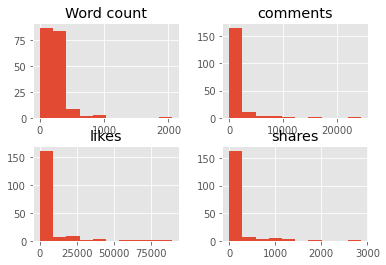

In [93]:
#Graficas relacionadas a los comentarios, imagenes, me gusta y compartido.
fb_posts.drop(['post_id','post_url', 'time'],1).hist()
plt.show()

## Filtro de datos

Filtrado de la informacion necesaria de los cinco candidatos que hemos seleccionado


In [94]:

filcan1 = fb_posts[(fb_posts['Word count'] <= 3500) & (fb_posts['shares'] <= 100000) & (fb_posts['candidato'] == 'ecuarauz2021')]
filcan2 = fb_posts[(fb_posts['Word count'] <= 3500) & (fb_posts['shares'] <= 100000) & (fb_posts['candidato'] == 'yakuperezoficial')]
filcan3 = fb_posts[(fb_posts['Word count'] <= 3500) & (fb_posts['shares'] <= 100000) & (fb_posts['candidato'] == 'LassoGuillermo')]
filcan4 = fb_posts[(fb_posts['Word count'] <= 3500) & (fb_posts['shares'] <= 100000) & (fb_posts['candidato'] == 'AlvaroNoboaPonton')]
filcan5 = fb_posts[(fb_posts['Word count'] <= 3500) & (fb_posts['shares'] <= 100000) & (fb_posts['candidato'] == 'LucioGutierrezPresidente')]

Se vuelve hacer un filtrado de informacion con respecto al numero de palagras y likes, que contiene cada una de las publicaciones de los candidatos 

In [95]:
colores=['red','blue']
t=[30,60]

f1_can1 = filcan1['Word count'].values
f2_can1 = filcan1['likes'].values

f1_can2 = filcan2['Word count'].values
f2_can2 = filcan2['likes'].values


f1_can3 = filcan3['Word count'].values
f2_can3 = filcan3['likes'].values

f1_can4 = filcan4['Word count'].values
f2_can4 = filcan4['likes'].values

f1_can5 = filcan5['Word count'].values
f2_can5 = filcan5['likes'].values


datos_candidatos = [filcan1,filcan2,filcan3,filcan4, filcan5]

asignar1=[]
asignar2=[]
asignar3=[]
asignar4=[]
asignar5=[]

for i in range(len(datos_candidatos)):
    if i == 0:
        for index, row in datos_candidatos[i].iterrows():
            if(row['Word count']>300):
                asignar1.append(colores[0])
            else:
                asignar1.append(colores[1])
    elif i == 1:
        for index, row in datos_candidatos[i].iterrows():
            if(row['Word count']>300):
                asignar2.append(colores[0])
            else:
                asignar2.append(colores[1])
    elif i == 2:
        for index, row in datos_candidatos[i].iterrows():
            if(row['Word count']>300):
                asignar3.append(colores[0])
            else:
                asignar3.append(colores[1])
    elif i == 3:
        for index, row in datos_candidatos[i].iterrows():
            if(row['Word count']>300):
                asignar4.append(colores[0])
            else:
                asignar4.append(colores[1])
    elif i == 4:
        for index, row in datos_candidatos[i].iterrows():
            if(row['Word count']>300):
                asignar5.append(colores[0])
            else:
                asignar5.append(colores[1])

## Candidato Andrez Arauz

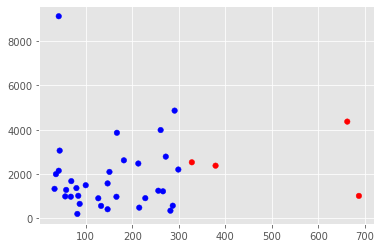

In [96]:
plt.scatter(f1_can1,f2_can1, c=asignar1, s=t[0])
plt.show()

## Candidato Yaku Perez

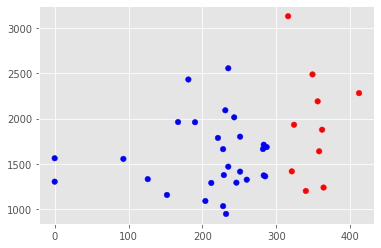

In [97]:
plt.scatter(f1_can2,f2_can2, c=asignar2, s=t[0])
plt.show()

## Candidato Guillermo Lasso

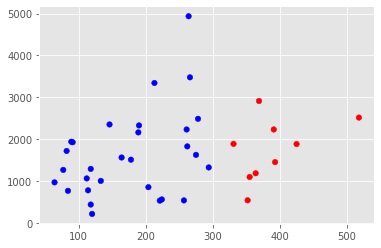

In [98]:
plt.scatter(f1_can3,f2_can3, c=asignar3, s=t[0])
plt.show()

## Candidato Alvaro Noboa

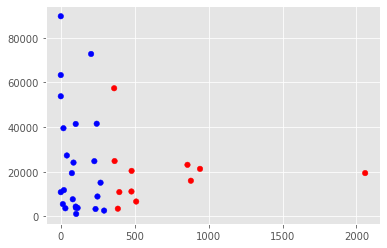

In [99]:
plt.scatter(f1_can4,f2_can4, c=asignar4, s=t[0])
plt.show()

## Candidato Lucio Gutierrez

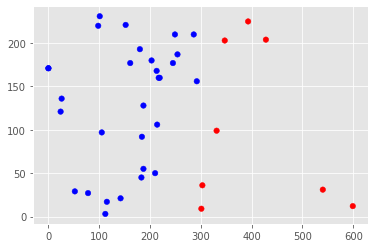

In [100]:
plt.scatter(f1_can5,f2_can5, c=asignar5, s=t[0])
plt.show()

## Regresion Lineal

Con la informacion que hemos recolectado de las publicaciones de los cinco candidatos.

In [101]:
dataX_can1 =filcan1[["Word count"]]
X_train_can1 = np.array(dataX_can1)
y_train_can1 = filcan1['likes'].values

dataX_can2 =filcan2[["Word count"]]
X_train_can2 = np.array(dataX_can2)
y_train_can2 = filcan2['likes'].values

dataX_can3 =filcan3[["Word count"]]
X_train_can3 = np.array(dataX_can3)
y_train_can3 = filcan3['likes'].values

dataX_can4 =filcan4[["Word count"]]
X_train_can4 = np.array(dataX_can4)
y_train_can4 = filcan4['likes'].values

dataX_can5 =filcan5[["Word count"]]
X_train_can5 = np.array(dataX_can5)
y_train_can5 = filcan5['likes'].values

# Objeto de Regresión Linear de cada candidato
regresion1 = linear_model.LinearRegression()
regresion2 = linear_model.LinearRegression()
regresion3 = linear_model.LinearRegression()
regresion4 = linear_model.LinearRegression()
regresion5 = linear_model.LinearRegression()

#Entrenamiento de los cinco modelos
regresion1.fit(X_train_can1, y_train_can1)
regresion2.fit(X_train_can2, y_train_can2)
regresion3.fit(X_train_can3, y_train_can3)
regresion4.fit(X_train_can4, y_train_can4)
regresion5.fit(X_train_can5, y_train_can5)

# Hacemos las predicciones 
y_pred_can1 = regresion1.predict(X_train_can1)
y_pred_can2 = regresion2.predict(X_train_can2)
y_pred_can3 = regresion3.predict(X_train_can3)
y_pred_can4 = regresion4.predict(X_train_can4)
y_pred_can5 = regresion5.predict(X_train_can5)

print("------------------Andrez Arauz------------------")

print('Coeficientes: \n', regresion1.coef_)
print('TERMINOS: \n', regresion1.intercept_)
print("ERROR MEDIO: %.2f" % mean_squared_error(y_train_can1, y_pred_can1))
print('Varianza: %.2f' % r2_score(y_train_can1, y_pred_can1))

print("--------------------Yaku Perez-----------------")

print('Coeficientes: \n', regresion2.coef_)
print('TERMINOS: \n', regresion2.intercept_)
print("ERROR MEDIO: %.2f" % mean_squared_error(y_train_can2, y_pred_can2))
print('Varianza: %.2f' % r2_score(y_train_can2, y_pred_can2))

print("-------------------Guillermo Lasso-------------------")

print('Coeficientes: \n', regresion3.coef_)
print('TERMINOS: \n', regresion3.intercept_)
print("ERROR MEDIO: %.2f" % mean_squared_error(y_train_can3, y_pred_can3))
print('Varianza: %.2f' % r2_score(y_train_can3, y_pred_can3))

print("-------------------Alvaro Noboa-------------------")

print('Coeficientes: \n', regresion4.coef_)
print('TERMINOS: \n', regresion4.intercept_)
print("ERROR MEDIO: %.2f" % mean_squared_error(y_train_can4, y_pred_can4))
print('Varianza: %.2f' % r2_score(y_train_can4, y_pred_can4))

print("--------------------Lucio Gutierrez-------------------")

print('Coeficientes: \n', regresion5.coef_)
print('TERMINOS: \n', regresion5.intercept_)
print("ERROR MEDIO: %.2f" % mean_squared_error(y_train_can5, y_pred_can5))
print('Varianza: %.2f' % r2_score(y_train_can5, y_pred_can5))

------------------Andrez Arauz------------------
Coeficientes: 
 [1.01900765]
TERMINOS: 
 1744.3900885621665
ERROR MEDIO: 2722870.98
Varianza: 0.01
--------------------Yaku Perez-----------------
Coeficientes: 
 [1.38034035]
TERMINOS: 
 1332.8884782892014
ERROR MEDIO: 208492.84
Varianza: 0.07
-------------------Guillermo Lasso-------------------
Coeficientes: 
 [2.39059741]
TERMINOS: 
 1107.5876476752956
ERROR MEDIO: 849628.07
Varianza: 0.08
-------------------Alvaro Noboa-------------------
Coeficientes: 
 [-6.70081674]
TERMINOS: 
 24684.97513010795
ERROR MEDIO: 463128343.39
Varianza: 0.01
--------------------Lucio Gutierrez-------------------
Coeficientes: 
 [-0.03215524]
TERMINOS: 
 131.39534678233653
ERROR MEDIO: 5554.99
Varianza: 0.00


## Candidato Andrez Arauz

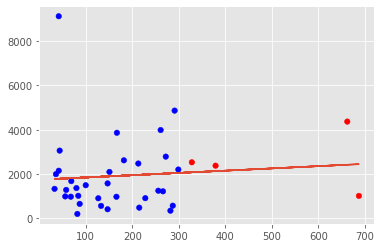

In [102]:
plt.scatter(f1_can1, f2_can1, c=asignar1, s=t[0])
plt.plot(X_train_can1,y_pred_can1)
plt.show()

## Candidato Yaku Perez

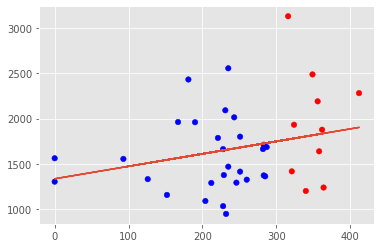

In [103]:
plt.scatter(f1_can2, f2_can2, c=asignar2, s=t[0])
plt.plot(X_train_can2,y_pred_can2)
plt.show()

## Candidato Guillermo Lasso

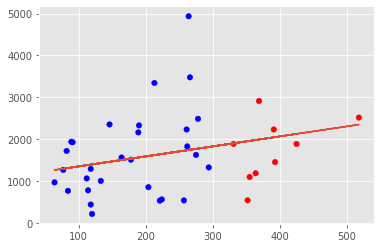

In [104]:
plt.scatter(f1_can3, f2_can3, c=asignar3, s=t[0])
plt.plot(X_train_can3,y_pred_can3)
plt.show()

## Candidato Alvaro Noboa

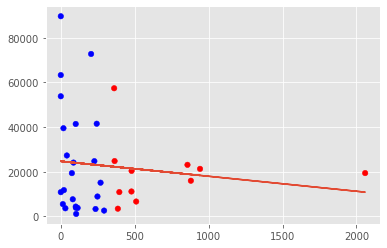

In [105]:
plt.scatter(f1_can4, f2_can4, c=asignar4, s=t[0])
plt.plot(X_train_can4,y_pred_can4)
plt.show()

## Candidato Lucio Gutierrez

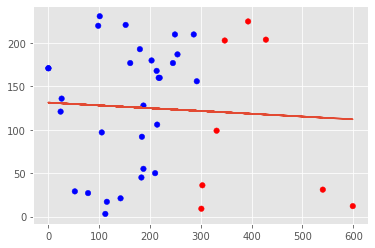

In [106]:
plt.scatter(f1_can5, f2_can5, c=asignar5, s=t[0])
plt.plot(X_train_can5,y_pred_can5)
plt.show()

## Regresion Polinomial

In [107]:
filcan1[["Word count"]]
x = list(filcan1[["Word count"]].values)
y = list(filcan1[["likes"]].values)
z = max(filcan1)
print(max(x))

[687]


In [108]:
pf = PolynomialFeatures(degree = 5)
X = pf.fit_transform(np.array(x).reshape(-1, 1))
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y) 
pred_x = list(range(0,int(max(x))+50))

Andres Arauz


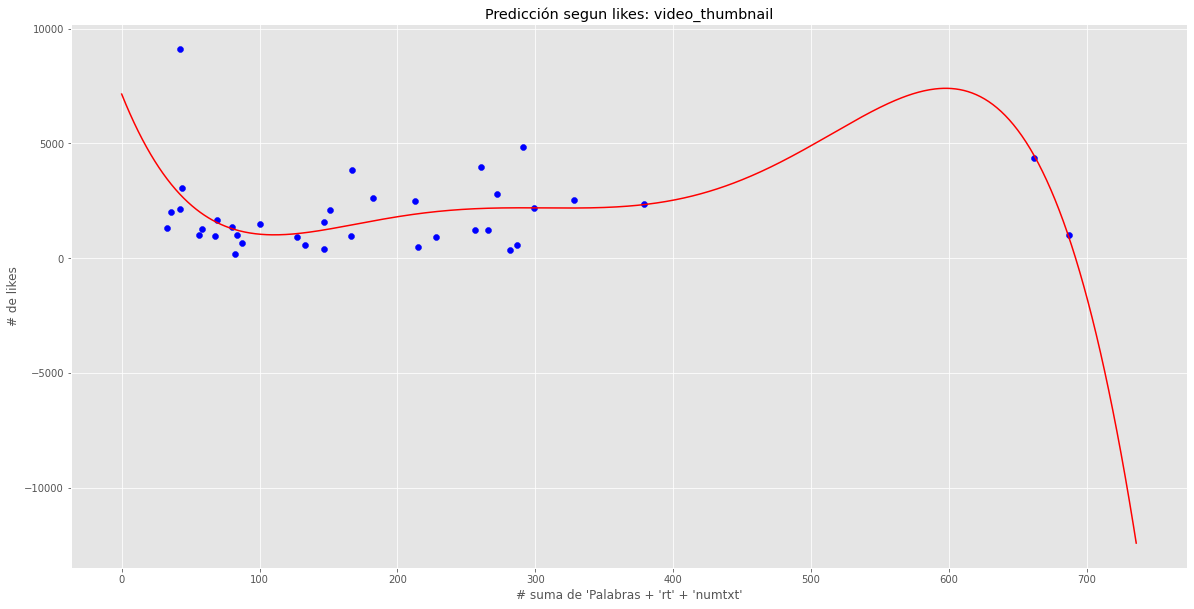

In [109]:
print("Andres Arauz")

puntos = pf.fit_transform(np.array(pred_x).reshape(-1, 1))
prediccion_entrenamiento = regresion_lineal.predict(puntos)
plt.figure(figsize=(20,10))
plt.title('Predicción segun likes: ' + str(z))
plt.plot(pred_x, prediccion_entrenamiento, color='red')
plt.scatter(x,y,label="Datos Reales",color="blue")
plt.xlabel("# suma de 'Palabras + 'rt' + 'numtxt'")
plt.ylabel("# de likes")
plt.show()

In [110]:
filcan2[["Word count"]]
x = list(filcan2[["Word count"]].values)
y = list(filcan2[["likes"]].values)
z = max(filcan2)
print(max(x))

[412]


In [111]:
pf = PolynomialFeatures(degree = 5)
X = pf.fit_transform(np.array(x).reshape(-1, 1))
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y) 
pred_x = list(range(0,int(max(x))+50))

Yaku Perez


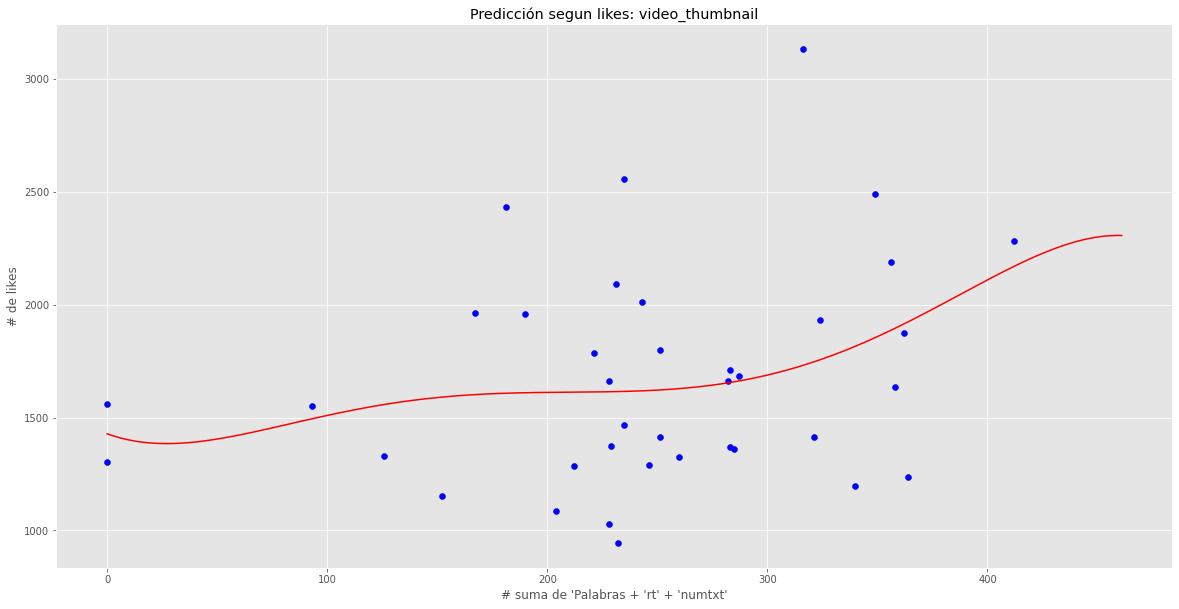

In [112]:
print("Yaku Perez")

puntos = pf.fit_transform(np.array(pred_x).reshape(-1, 1))
prediccion_entrenamiento = regresion_lineal.predict(puntos)
plt.figure(figsize=(20,10))
plt.title('Predicción segun likes: ' + str(z))
plt.plot(pred_x, prediccion_entrenamiento, color='red')
plt.scatter(x,y,label="Datos Reales",color="blue")
plt.xlabel("# suma de 'Palabras + 'rt' + 'numtxt'")
plt.ylabel("# de likes")
plt.show()



In [113]:
filcan3[["Word count"]]
x = list(filcan3[["Word count"]].values)
y = list(filcan3[["likes"]].values)
z = max(filcan3)
print(max(x))

[518]


In [114]:
pf = PolynomialFeatures(degree = 5)
X = pf.fit_transform(np.array(x).reshape(-1, 1))
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y) 
pred_x = list(range(0,int(max(x))+50))

Guillermo Lasso


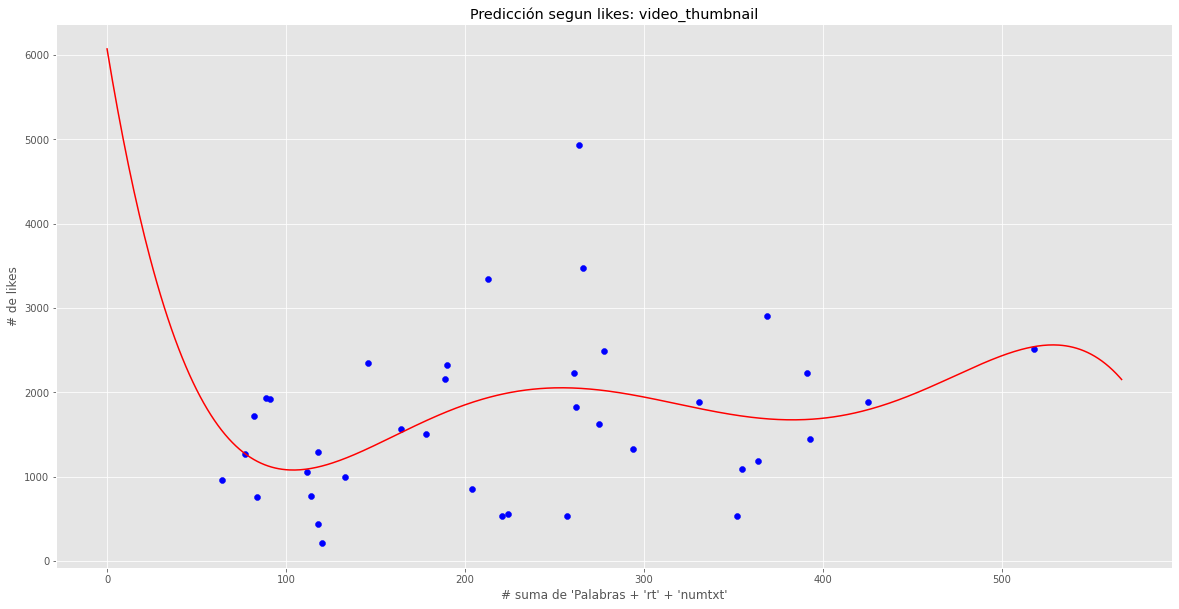

In [115]:
print("Guillermo Lasso")

puntos = pf.fit_transform(np.array(pred_x).reshape(-1, 1))
prediccion_entrenamiento = regresion_lineal.predict(puntos)
plt.figure(figsize=(20,10))
plt.title('Predicción segun likes: ' + str(z))
plt.plot(pred_x, prediccion_entrenamiento, color='red')
plt.scatter(x,y,label="Datos Reales",color="blue")
plt.xlabel("# suma de 'Palabras + 'rt' + 'numtxt'")
plt.ylabel("# de likes")
plt.show()

In [116]:
filcan4[["Word count"]]
x = list(filcan4[["Word count"]].values)
y = list(filcan4[["likes"]].values)
z = max(filcan4)
print(max(x))

[2059]


In [117]:
pf = PolynomialFeatures(degree = 5)
X = pf.fit_transform(np.array(x).reshape(-1, 1))
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y) 
pred_x = list(range(0,int(max(x))+50))

Alvaro Noboa


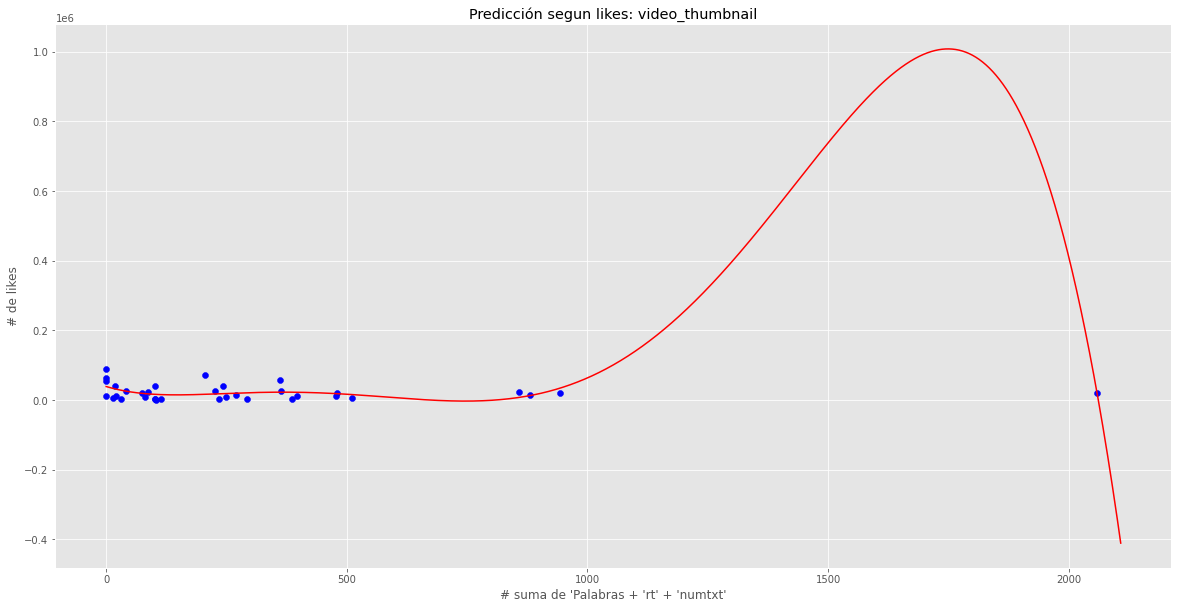

In [118]:
print("Alvaro Noboa")

puntos = pf.fit_transform(np.array(pred_x).reshape(-1, 1))
prediccion_entrenamiento = regresion_lineal.predict(puntos)
plt.figure(figsize=(20,10))
plt.title('Predicción segun likes: ' + str(z))
plt.plot(pred_x, prediccion_entrenamiento, color='red')
plt.scatter(x,y,label="Datos Reales",color="blue")
plt.xlabel("# suma de 'Palabras + 'rt' + 'numtxt'")
plt.ylabel("# de likes")
plt.show()

In [119]:
filcan5[["Word count"]]
x = list(filcan5[["Word count"]].values)
y = list(filcan5[["likes"]].values)
z = max(filcan5)
print(max(x))

[599]


In [120]:
pf = PolynomialFeatures(degree = 5)
X = pf.fit_transform(np.array(x).reshape(-1, 1))
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y) 
pred_x = list(range(0,int(max(x))+50))

Lucio Gutierrez


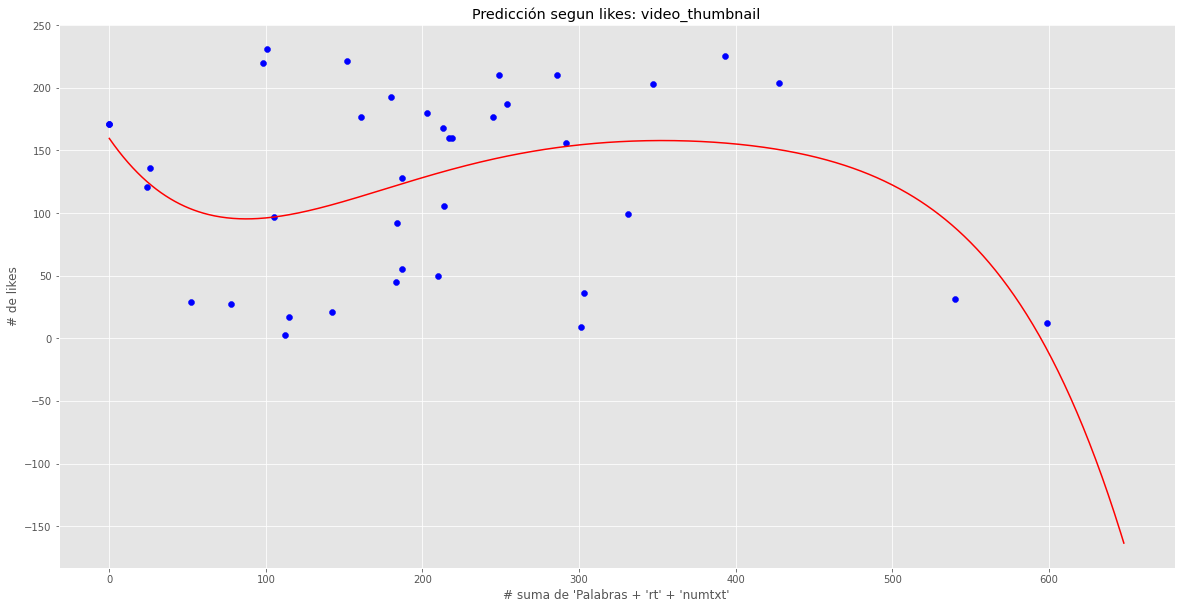

In [121]:
print("Lucio Gutierrez")

puntos = pf.fit_transform(np.array(pred_x).reshape(-1, 1))
prediccion_entrenamiento = regresion_lineal.predict(puntos)
plt.figure(figsize=(20,10))
plt.title('Predicción segun likes: ' + str(z))
plt.plot(pred_x, prediccion_entrenamiento, color='red')
plt.scatter(x,y,label="Datos Reales",color="blue")
plt.xlabel("# suma de 'Palabras + 'rt' + 'numtxt'")
plt.ylabel("# de likes")
plt.show()

# Simulacion segun el numero de likes de dos candidatos

In [124]:
import random

random.seed(1)
lasso_digits = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
arauz_digits = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lasso_win_pct = 69.13
arauz_win_pct = 29.28
number_of_sims = 1000
total_wards = 0
total_arauz_votes = 0
total_lasso_votes = 0
total_votes = 0
for i in range(number_of_sims):
    my_input = open('data_likes.txt')
    for line in my_input:
        total_wards += 1
        fields = line.strip().split()
        num_voters = int(fields[0])
        arauz_votes_in_ward = 0
        lasso_votes_in_ward = 0
        for j in range(num_voters):
            random_num = random.random() * 100
            if random_num <= lasso_win_pct:
                lasso_votes_in_ward += 1
                total_lasso_votes += 1
            elif random_num <= (lasso_win_pct + arauz_win_pct) :
                arauz_votes_in_ward += 1
                total_arauz_votes += 1
            total_votes += 1
        arauz_digit = int(str(arauz_votes_in_ward)[0])
        lasso_digit = int(str(lasso_votes_in_ward)[0])
        arauz_digits[arauz_digit] += 1
        lasso_digits[lasso_digit] += 1
    if i % 100 == 0:
        print('Simulacion con ', i)

arauz_win_pct = 100.0 * total_arauz_votes / total_votes
lasso_win_pct = 100.0 * total_lasso_votes / total_votes
print('LASSO gana con el:', lasso_win_pct , '%')
print('ARAUZ gana con el:', arauz_win_pct, '%')

Simulacion con  0
Simulacion con  100
Simulacion con  200
Simulacion con  300
Simulacion con  400
Simulacion con  500
Simulacion con  600
Simulacion con  700
Simulacion con  800
Simulacion con  900
LASSO gana con el: 69.13018646106737 %
ARAUZ gana con el: 29.280210383858268 %


In [123]:
MAXIMO_VOTANTES = 500
NUMERO_MESAS = 6
TIEMPO_VOTACION = 10
TIEMPO_LLEGADA = 5
TIEMPO_SIMULACION = 50

# Creamos un diccionario para almacenar las horas en que se sufragan los votantes..
votos = {}

class Lugar_Votacion():

    def __init__(self, environment, numero_mesas, tiempo_votacion):
        # Guardar el entorno en una variable
        self.env = environment
        # Recurso que representa las mesas electorales
        self.mesa = simpy.Resource(environment, numero_mesas)
        # Variable para el tiempo de atención.
        self.tiempo_votacion = tiempo_votacion

    def atender_votante(self, votante):
        # Simular la votación
        yield self.env.timeout(random.randint(TIEMPO_VOTACION - 5, TIEMPO_VOTACION + 5))

def llegada_votante(env, nombre, Lugar_Votacion):
    print('El %s llega a sufragar' % (nombre))

    # Especificamos que vamos a usar un recurso (Resource) que representa
    with Lugar_Votacion.mesa.request() as maquina:
        # Ocupamos la mesa electoral.
        yield maquina
        # El votante ingresa a votar.
        print('El %s ingresa a sufragar:' % (nombre))
        # Procesamos la operacion de sufragio
        yield env.process(Lugar_Votacion.atender_votante(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha atendido al votante.
        print('EL %s entra a sufragar'%(nombre))
        print('El %s recibe su certificado de votación.'%(nombre))
        print('El %s sale del Recinto Electoral.'%(nombre))
        votos[nombre] = random.randint(1, 3) #Aleatorio para los votos a las diferentes listas.


def simular(env, mesas, tiempo_votacion, intervalo):
    lugar = Lugar_Votacion(env, mesas, tiempo_votacion)
    # Iniciamos con 3 votantes
    for i in range(3):
        env.process(llegada_votante(env, 'votante-%d' % (i + 1), lugar))

    # Ejecutamos la simulación
    while True:
        yield env.timeout(random.randint(intervalo - 3, intervalo + 3))
        i += 1
        # generamos mas votantes
        env.process(llegada_votante(env, 'votante-%d' % (i + 1), lugar))


print('Recinto')

# Creamos el entorno de simulacion
env = simpy.Environment()
env.process(simular(env, NUMERO_MESAS, TIEMPO_VOTACION, TIEMPO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until=TIEMPO_SIMULACION)

print("Detalle de los votos")
print(votos)

Recinto
El votante-1 llega a sufragar
El votante-2 llega a sufragar
El votante-3 llega a sufragar
El votante-1 ingresa a sufragar:
El votante-2 ingresa a sufragar:
El votante-3 ingresa a sufragar:
EL votante-3 entra a sufragar
El votante-3 recibe su certificado de votación.
El votante-3 sale del Recinto Electoral.
El votante-4 llega a sufragar
El votante-4 ingresa a sufragar:
El votante-5 llega a sufragar
El votante-5 ingresa a sufragar:
EL votante-1 entra a sufragar
El votante-1 recibe su certificado de votación.
El votante-1 sale del Recinto Electoral.
El votante-6 llega a sufragar
El votante-6 ingresa a sufragar:
EL votante-2 entra a sufragar
El votante-2 recibe su certificado de votación.
El votante-2 sale del Recinto Electoral.
El votante-7 llega a sufragar
El votante-7 ingresa a sufragar:
EL votante-6 entra a sufragar
El votante-6 recibe su certificado de votación.
El votante-6 sale del Recinto Electoral.
EL votante-5 entra a sufragar
El votante-5 recibe su certificado de votació